Serial No.: Serial number of student

GRE Scores: GRE score (out of 340)

TOEFL Scores: TOEFL score (out of 120)

University Rating: University rating (out of 5)

SOP: Strength of Statement of Purpose (out of 5)

LOR: Strength of Letter of Recommendation (out of 5)

CGPA: Undergraduate CGPA (out of 10)

Research: Research experience (either 0 or 1)

Chance of Admit: Chance of admission (target/dependent variable)

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv("Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [16]:
df = data.drop(columns="Serial No.")

In [17]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [18]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit        int64
dtype: object

In [19]:
df['Chance of Admit'].value_counts(dropna=False)

0    220
1    180
Name: Chance of Admit, dtype: int64

In [20]:
X = df.drop(columns='Chance of Admit')
y = df['Chance of Admit']

In [8]:
import statsmodels.api as sma

In [9]:
temp_x = sma.add_constant(X)

In [10]:
temp_x

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,337,118,4,4.5,4.5,9.65,1
1,1.0,324,107,4,4.0,4.5,8.87,1
2,1.0,316,104,3,3.0,3.5,8.00,1
3,1.0,322,110,3,3.5,2.5,8.67,1
4,1.0,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,1.0,324,110,3,3.5,3.5,9.04,1
396,1.0,325,107,3,3.0,3.5,9.11,1
397,1.0,330,116,4,5.0,4.5,9.45,1
398,1.0,312,103,3,3.5,4.0,8.78,0


In [22]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(temp_x,y,test_size=0.20,random_state=1)

# Logistic Regression (Full Model)

In [13]:
logreg = sma.Logit(y_train,X_train).fit()
print(logreg.summary()) #MAXIMUM_LIKELYHOOD_ESTIMATION


Optimization terminated successfully.
         Current function value: 0.269228
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Thu, 07 Sep 2023   Pseudo R-squ.:                  0.6084
Time:                        09:53:16   Log-Likelihood:                -86.153
converged:                       True   LL-Null:                       -220.00
Covariance Type:            nonrobust   LLR p-value:                 4.733e-54
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -56.2064      9.808     -5.731      0.000     -75.430     -36.983
GRE Scor

In [14]:
1-(log-Likelihood)/(LL-Null) will give Pseudo R-Square
LLR p-value < alpha 

SyntaxError: invalid syntax (4106335821.py, line 1)

In [ ]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds

In [ ]:
ypred_prob = logreg.predict(X_test)
ypred_prob[:5]

In [ ]:
ypred = [0 if x<0.5 else 1 for x in ypred_prob]

In [ ]:
ypred[0:5]

In [ ]:
y_test[0:5]

In [ ]:
print(ypred[0:10])
print(y_test[0:10])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
cm = confusion_matrix(y_true=y_test,y_pred=ypred)
cm

In [ ]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

denom = TN+FP+FN+TP
numer = TN+TP
acc = numer/denom

print(acc)

In [ ]:
accuracy_score(y_true=y_test,y_pred=ypred)

In [ ]:
# Recall for class 0
specifity = TN / (TN + FP)
print('specifity :',specifity)

In [ ]:
# Recall for class 1
sensitivity = TP / (FN + TP)
print('sensitivity :',sensitivity)

In [ ]:
from sklearn.metrics import recall_score,classification_report

In [ ]:
recall_score(y_true=y_test,y_pred=ypred)

In [ ]:
print(classification_report(y_true=y_test,y_pred=ypred))

In [ ]:
13/19


In [ ]:
#precision for class 0
precision_0 = TN/(TN+FN)
precision_0

In [ ]:
#precision for class 1
precision_1 = TP/(FP+TP)
precision_1

In [ ]:
#recall for class 1 
2*precision_1*sensitivity/(precision_1+sensitivity)

In [ ]:
#recall for class 0
2*precision_0*specifity/(precision_0+specifity)

## Log Loss

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_true=y_test,y_pred=ypred)

### ROC AND AUC


1. F1 can use of any number or class
2. AUC can use on Imbalance dataset dont use accuracy score
3. For balanced dataset use accuracy score

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)




In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred_test_lr = lr.predict(X_test)

In [ ]:
accuracy_score(y_test,pred_test_lr)

In [ ]:
confusion_matrix(y_test,pred_test_lr)

In [ ]:
predict_proba_test = lr.predict_proba(X_test)
predict_proba_test[0:8]

In [ ]:
predict_proba_test

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
roc_curve(y_test,predict_proba_test[:,1])

In [ ]:
fpr,tpr,thershold = roc_curve(y_test,predict_proba_test[:,1])

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1],[0,1],'r--')
plt.show()

In [ ]:
print(roc_auc_score(y_test,predict_proba_test[:,1]))

In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
print(confusion_matrix(y_test,pred_test_lr))
print(cohen_kappa_score(y_test,pred_test_lr))

In [ ]:
youden_table = pd.DataFrame({'TPR' :tpr,'FPR':fpr,'Thershold' : thershold})

In [ ]:
youden_table

In [ ]:
youden_table['Difference'] = youden_table['TPR'] - youden_table['FPR']

In [99]:
youden_table = youden_table.sort_values('Difference',ascending =False)
youden_table

,TPR,FPR,Thershold,Difference
10,0.891892,0.116279,0.457144,0.775613
8,0.864865,0.093023,0.459257,0.771842
9,0.864865,0.116279,0.457163,0.748586
6,0.810811,0.069767,0.645932,0.741043
4,0.756757,0.023256,0.681826,0.733501
12,0.918919,0.186047,0.414473,0.732872
7,0.810811,0.093023,0.635767,0.717788
11,0.891892,0.186047,0.424711,0.705845
2,0.702703,0.000000,0.762740,0.702703
5,0.756757,0.069767,0.664066,0.686989


#### KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [16]:
from sklearn.preprocessing import StandardScaler

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [21]:
y_train

93     0
23     1
299    0
13     0
90     0
      ..
255    1
72     1
396    1
235    1
37     0
Name: Chance of Admit, Length: 320, dtype: int64

In [22]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [28]:
sc = StandardScaler()
x_train_sc =sc.fit_transform(X_train)
x_test_sc =sc.transform(X_test)

In [29]:
print(x_train_sc)

[[-1.39755883 -1.69458127 -0.92006215 ... -0.49136419 -1.21075242
   0.92179769]
 [ 1.51505637  1.89658433  1.67776038 ...  1.16958518  1.85255272
   0.92179769]
 [-1.04451456  0.75394073 -0.0541213  ...  0.0622856   0.08526129
  -1.08483674]
 ...
 [ 0.72070677 -0.06223327 -0.0541213  ...  0.0622856   0.85950325
   0.92179769]
 [ 0.80896784  0.59070593  1.67776038 ...  0.61593539  1.06147941
   0.92179769]
 [-1.48581989 -0.38870287 -1.78600299 ... -1.59866377 -1.3454032
  -1.08483674]]


In [30]:
print(x_test_sc)

[[-0.42668709 -0.71517247 -0.0541213   0.11070689  0.61593539  0.3040688
  -1.08483674]
 [-1.48581989 -1.20487687 -0.0541213  -1.36538492 -0.49136419  0.10209264
   0.92179769]
 [ 0.6324457   0.75394073  0.81181954  0.60273749  0.0622856   0.28723745
   0.92179769]
 [ 0.6324457  -0.06223327  1.67776038  0.11070689  0.61593539  0.10209264
   0.92179769]
 [ 0.45592357  0.42747113  0.81181954  0.60273749  1.72323497  0.89316594
   0.92179769]
 [-0.77973136 -0.22546807 -0.0541213  -0.38132372 -0.49136419 -0.60482393
  -1.08483674]
 [-0.60320923 -0.22546807 -0.92006215  0.11070689 -1.04501398 -0.45334181
  -1.08483674]
 [-1.48581989 -0.87840727 -0.92006215 -1.85741553 -1.59866377 -1.22758377
  -1.08483674]
 [-0.60320923 -1.36811167 -0.92006215 -1.85741553 -1.59866377 -2.18697054
  -1.08483674]
 [ 2.04462277  0.75394073  0.81181954  1.58679869  1.16958518  1.78522733
   0.92179769]
 [ 0.36766251  0.59070593  0.81181954  0.60273749  0.61593539  0.62386439
   0.92179769]
 [ 1.6915785   1.89658

In [36]:
knn = KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(x_train_sc,y_train)
ypredict_knn = knn.predict(x_test_sc)
print(confusion_matrix(y_test,ypredict_knn))
print(accuracy_score(y_test,ypredict_knn))

[[39  4]
 [ 6 31]]
0.875


In [37]:
knn = KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(x_train_sc,y_train)
ypredict_knn = knn.predict(x_test_sc)
print(confusion_matrix(y_test,ypredict_knn))
print(accuracy_score(y_test,ypredict_knn))

[[40  3]
 [ 6 31]]
0.8875


In [38]:
knn = KNeighborsClassifier(n_neighbors=9,p=2)
knn.fit(x_train_sc,y_train)
ypredict_knn = knn.predict(x_test_sc)
print(confusion_matrix(y_test,ypredict_knn))
print(accuracy_score(y_test,ypredict_knn))

[[39  4]
 [ 6 31]]
0.875


In [41]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors' : [3,5,7],
             'p' : [1,2]}

knn = KNeighborsClassifier()
knncv =GridSearchCV(knn,parameters,cv=5,scoring = 'accuracy')
knncv.fit(x_train_sc,y_train)
knncv.best_params_

{'n_neighbors': 3, 'p': 2}

In [50]:
knn = KNeighborsClassifier(n_neighbors=3,p=2)
knn.fit(x_train_sc,y_train)
ypredict_knn = knn.predict(x_test_sc)
print(confusion_matrix(y_test,ypredict_knn))
print(accuracy_score(y_test,ypredict_knn))
print('Train Score :',knn.score(x_train_sc,y_train))
print('Test Score :',knn.score(x_test_sc,y_test))

[[37  6]
 [ 8 29]]
0.825
Train Score : 0.91875
Test Score : 0.825


In [52]:
knn = KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(x_train_sc,y_train)
ypredict_knn = knn.predict(x_test_sc)
print(confusion_matrix(y_test,ypredict_knn))
print(accuracy_score(y_test,ypredict_knn))
print('Train Score :',knn.score(x_train_sc,y_train))
print('Test Score :',knn.score(x_test_sc,y_test))

[[40  3]
 [ 6 31]]
0.8875
Train Score : 0.890625
Test Score : 0.8875


In [51]:
knn = KNeighborsClassifier(weights='distance',n_neighbors=3,p=2)
knn.fit(x_train_sc,y_train)
ypredict_knn = knn.predict(x_test_sc)
print(confusion_matrix(y_test,ypredict_knn))
print(accuracy_score(y_test,ypredict_knn))
print('Train Score :',knn.score(x_train_sc,y_train))
print('Test Score :',knn.score(x_test_sc,y_test))

[[37  6]
 [ 8 29]]
0.825
Train Score : 1.0
Test Score : 0.825


In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [58]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
ypredict_gnb = GNB.predict(X_test)
print(confusion_matrix(y_test,ypredict_gnb))
print(accuracy_score(y_test,ypredict_gnb))
print('Train Score :',GNB.score(X_train,y_train))
print('Test Score :',GNB.score(X_test,y_test))

[[40  3]
 [ 5 32]]
0.9
Train Score : 0.859375
Test Score : 0.9


In [59]:
BNB = BernoulliNB()
BNB.fit(X_train,y_train)
ypredict_bnb = BNB.predict(X_test)
print(confusion_matrix(y_test,ypredict_bnb))
print(accuracy_score(y_test,ypredict_bnb))
print('Train Score :',BNB.score(X_train,y_train))
print('Test Score :',BNB.score(X_test,y_test))

[[28 15]
 [ 6 31]]
0.7375
Train Score : 0.75625
Test Score : 0.7375


In [62]:
Muls = MultinomialNB()
Muls.fit(X_train,y_train)
ypredict_muls = Muls.predict(X_test)
print(confusion_matrix(y_test,ypredict_muls))
print(accuracy_score(y_test,ypredict_muls))
print('Train Score :',Muls.score(X_train,y_train))
print('Test Score :',Muls.score(X_test,y_test))

[[36  7]
 [ 4 33]]
0.8625
Train Score : 0.81875
Test Score : 0.8625


In [2]:
P1 = 0.5
P2 = 0.5

In [6]:
def entrop(P1,P2):
    print(-(P1*np.log2(P1))-(P2*np.log2(P2)))

In [7]:
entrop(0.6,0.4)

0.9709505944546686


In [10]:
entrop(0.5,0.5)

1.0


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [43]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)
pred_test = dt.predict(X_test)
accuracy_score(y_true=y_test,y_pred=pred_test)

0.825

In [44]:
dt.score(X_train,y_train)

1.0

In [46]:
from sklearn import tree

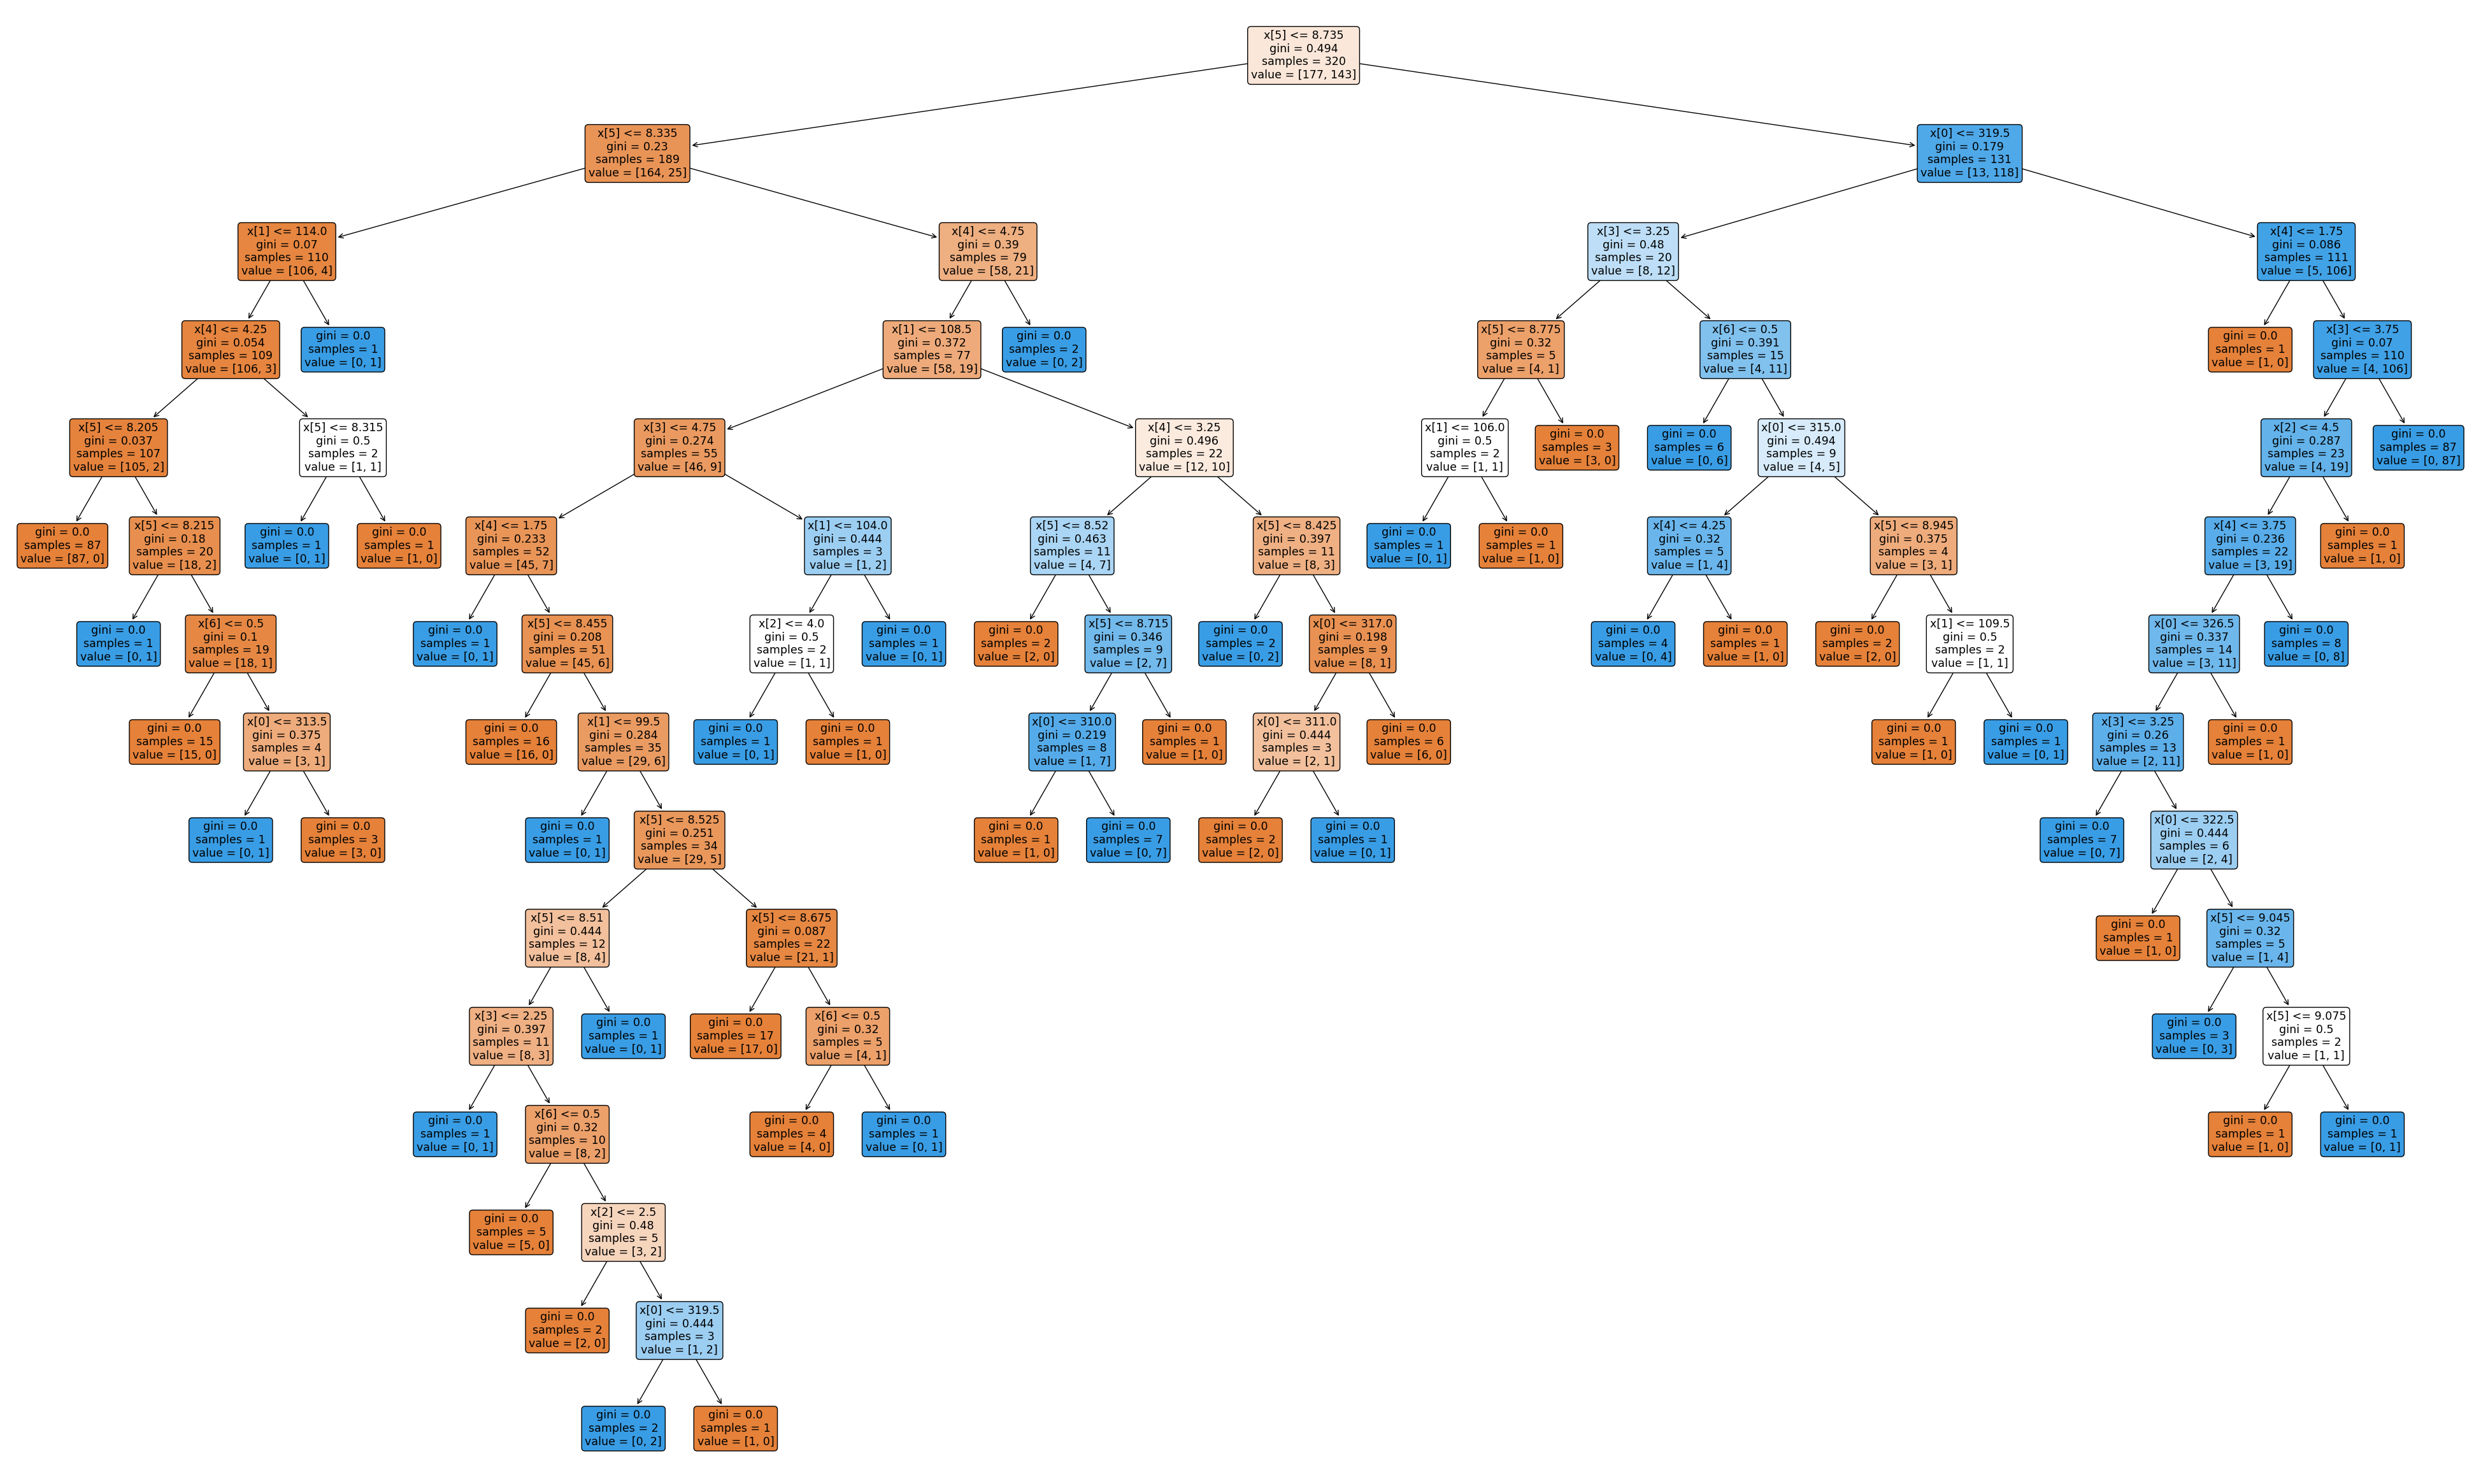

In [55]:
plt.figure(figsize=(50,30))
tree.plot_tree(dt,rounded=True,filled=True)
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [56]:
dt.tree_.max_depth

14

In [57]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=1)
dt.fit(X_train,y_train)
pred_test = dt.predict(X_test)
print('Accuracy_score:',accuracy_score(y_true=y_test,y_pred=pred_test))
print('Train_score:',dt.score(X_train,y_train))

Accuracy_score: 0.8
Train_score: 1.0


In [58]:
dt.tree_.max_depth

10

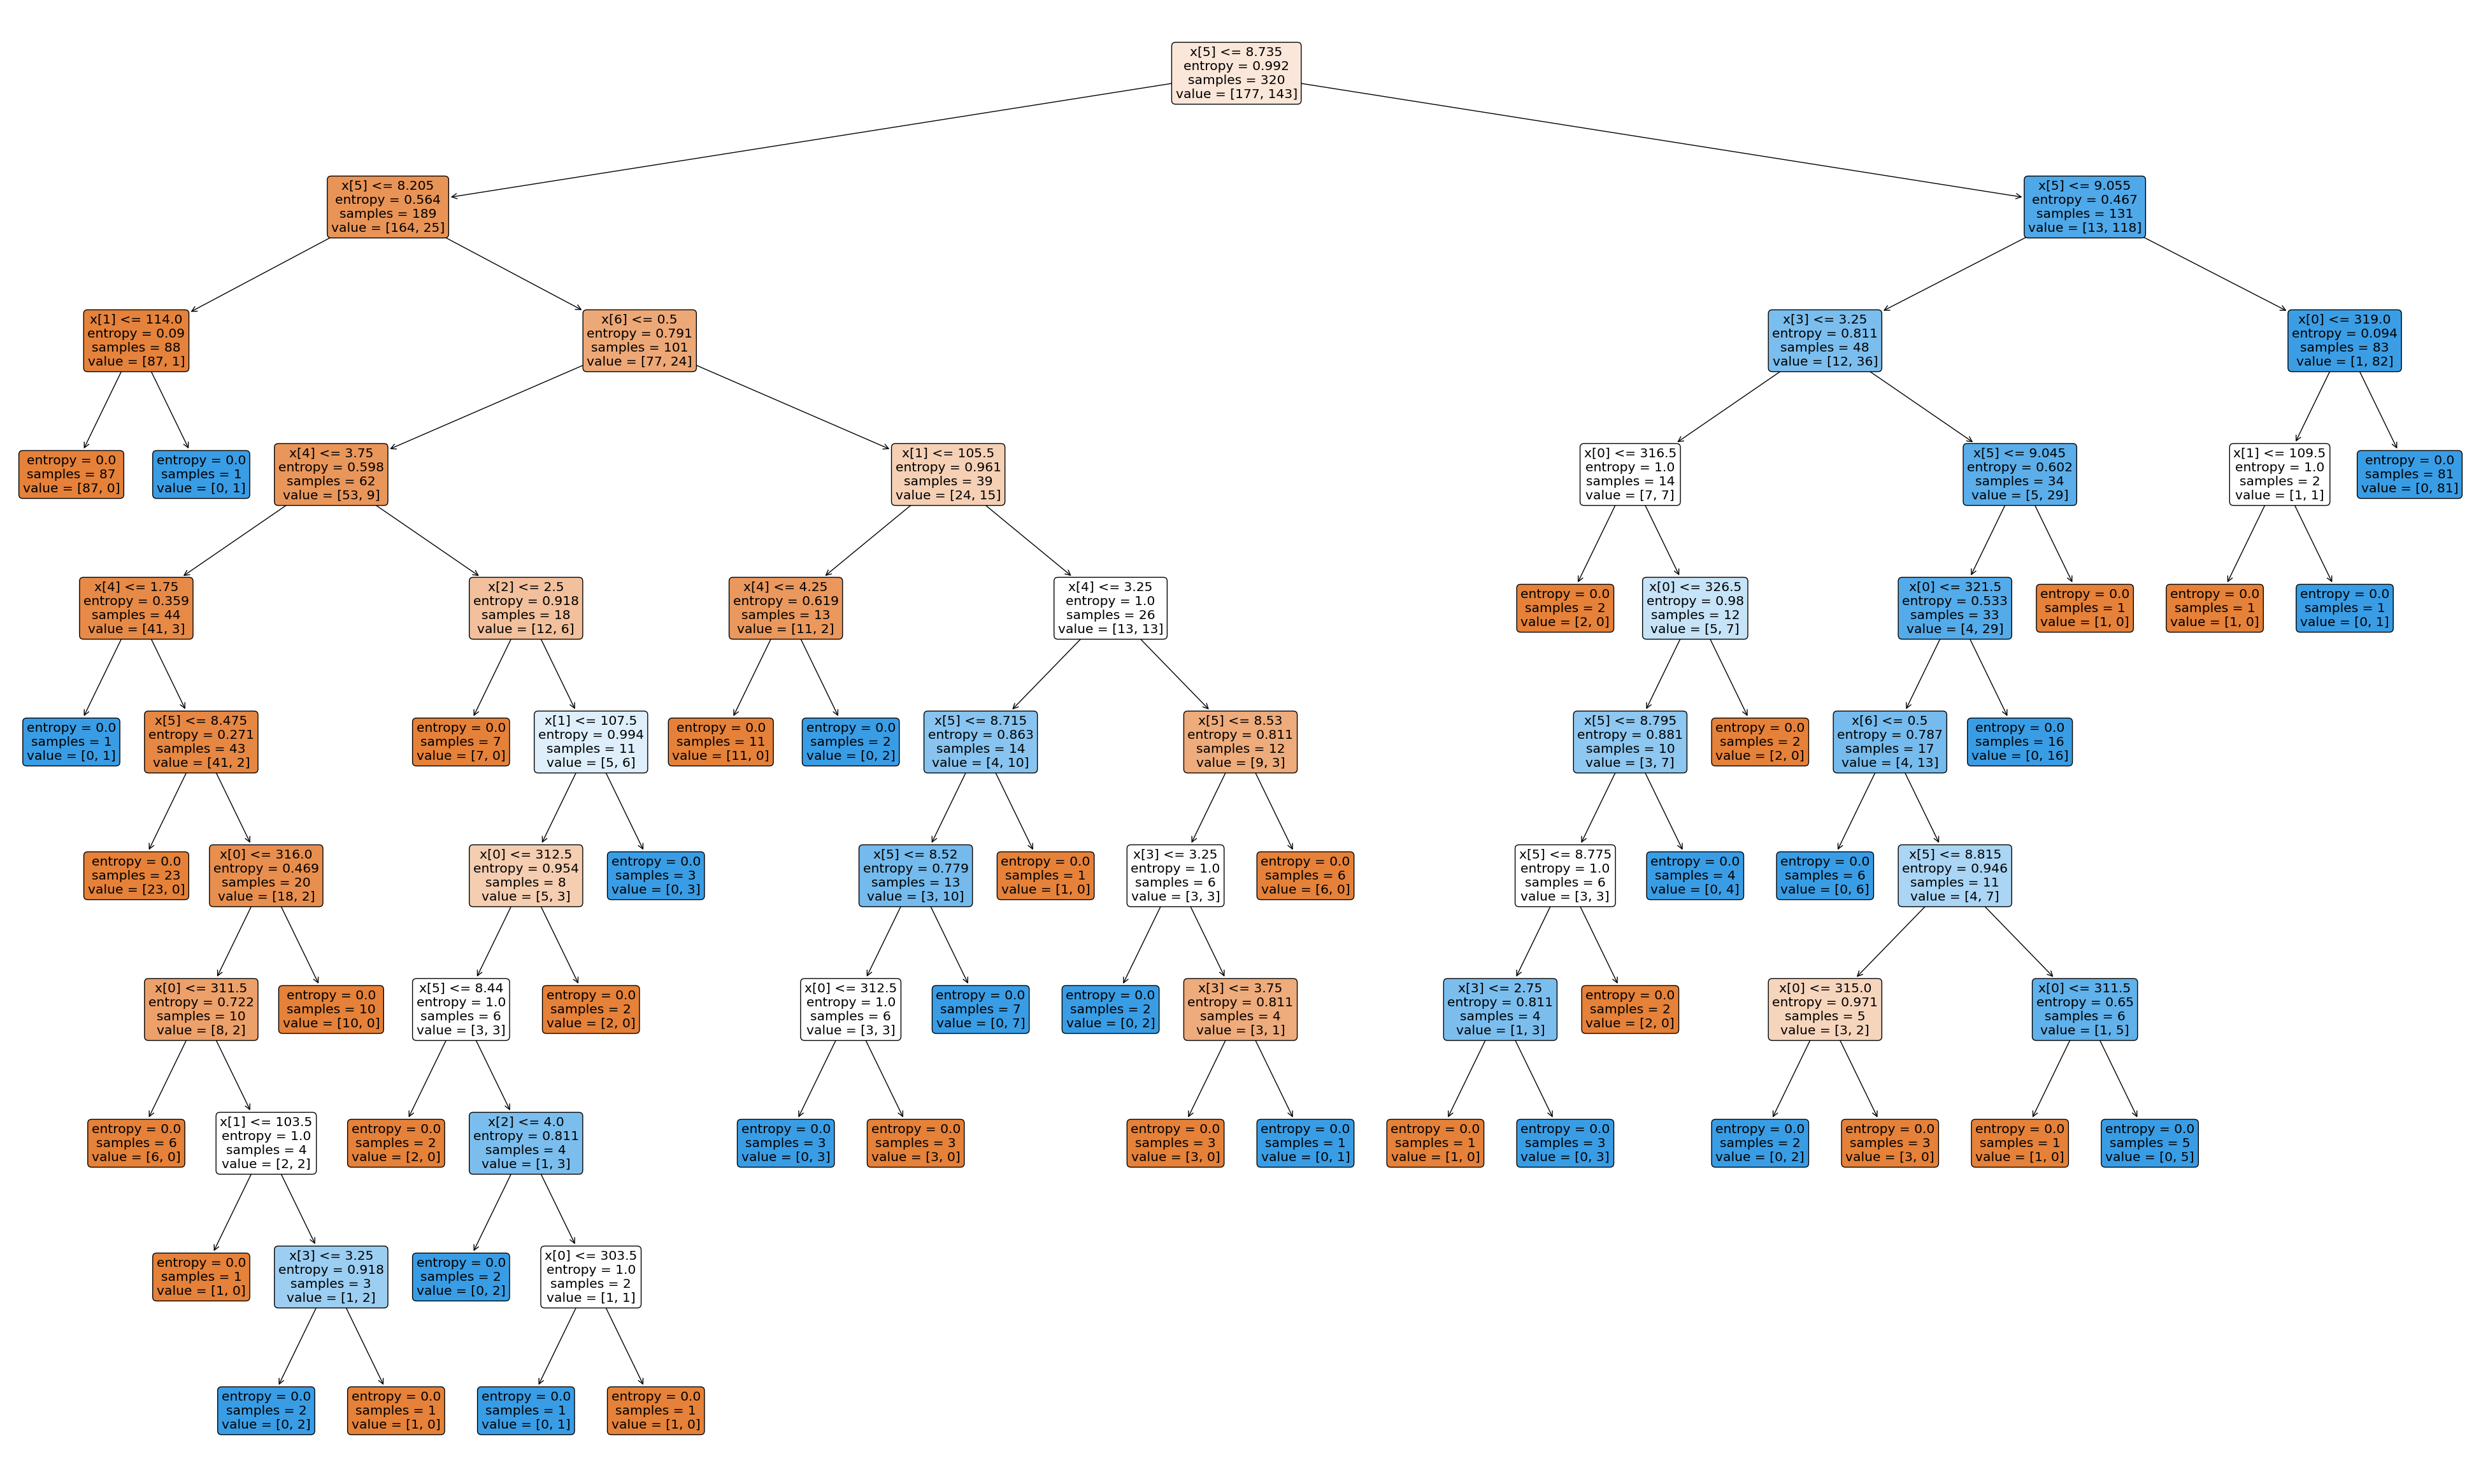

In [62]:
plt.figure(figsize=(50,30))
tree.plot_tree(dt,rounded=True,filled=True)
plt.show()

Accuracy_score: 0.8125
Train_score: 0.9375


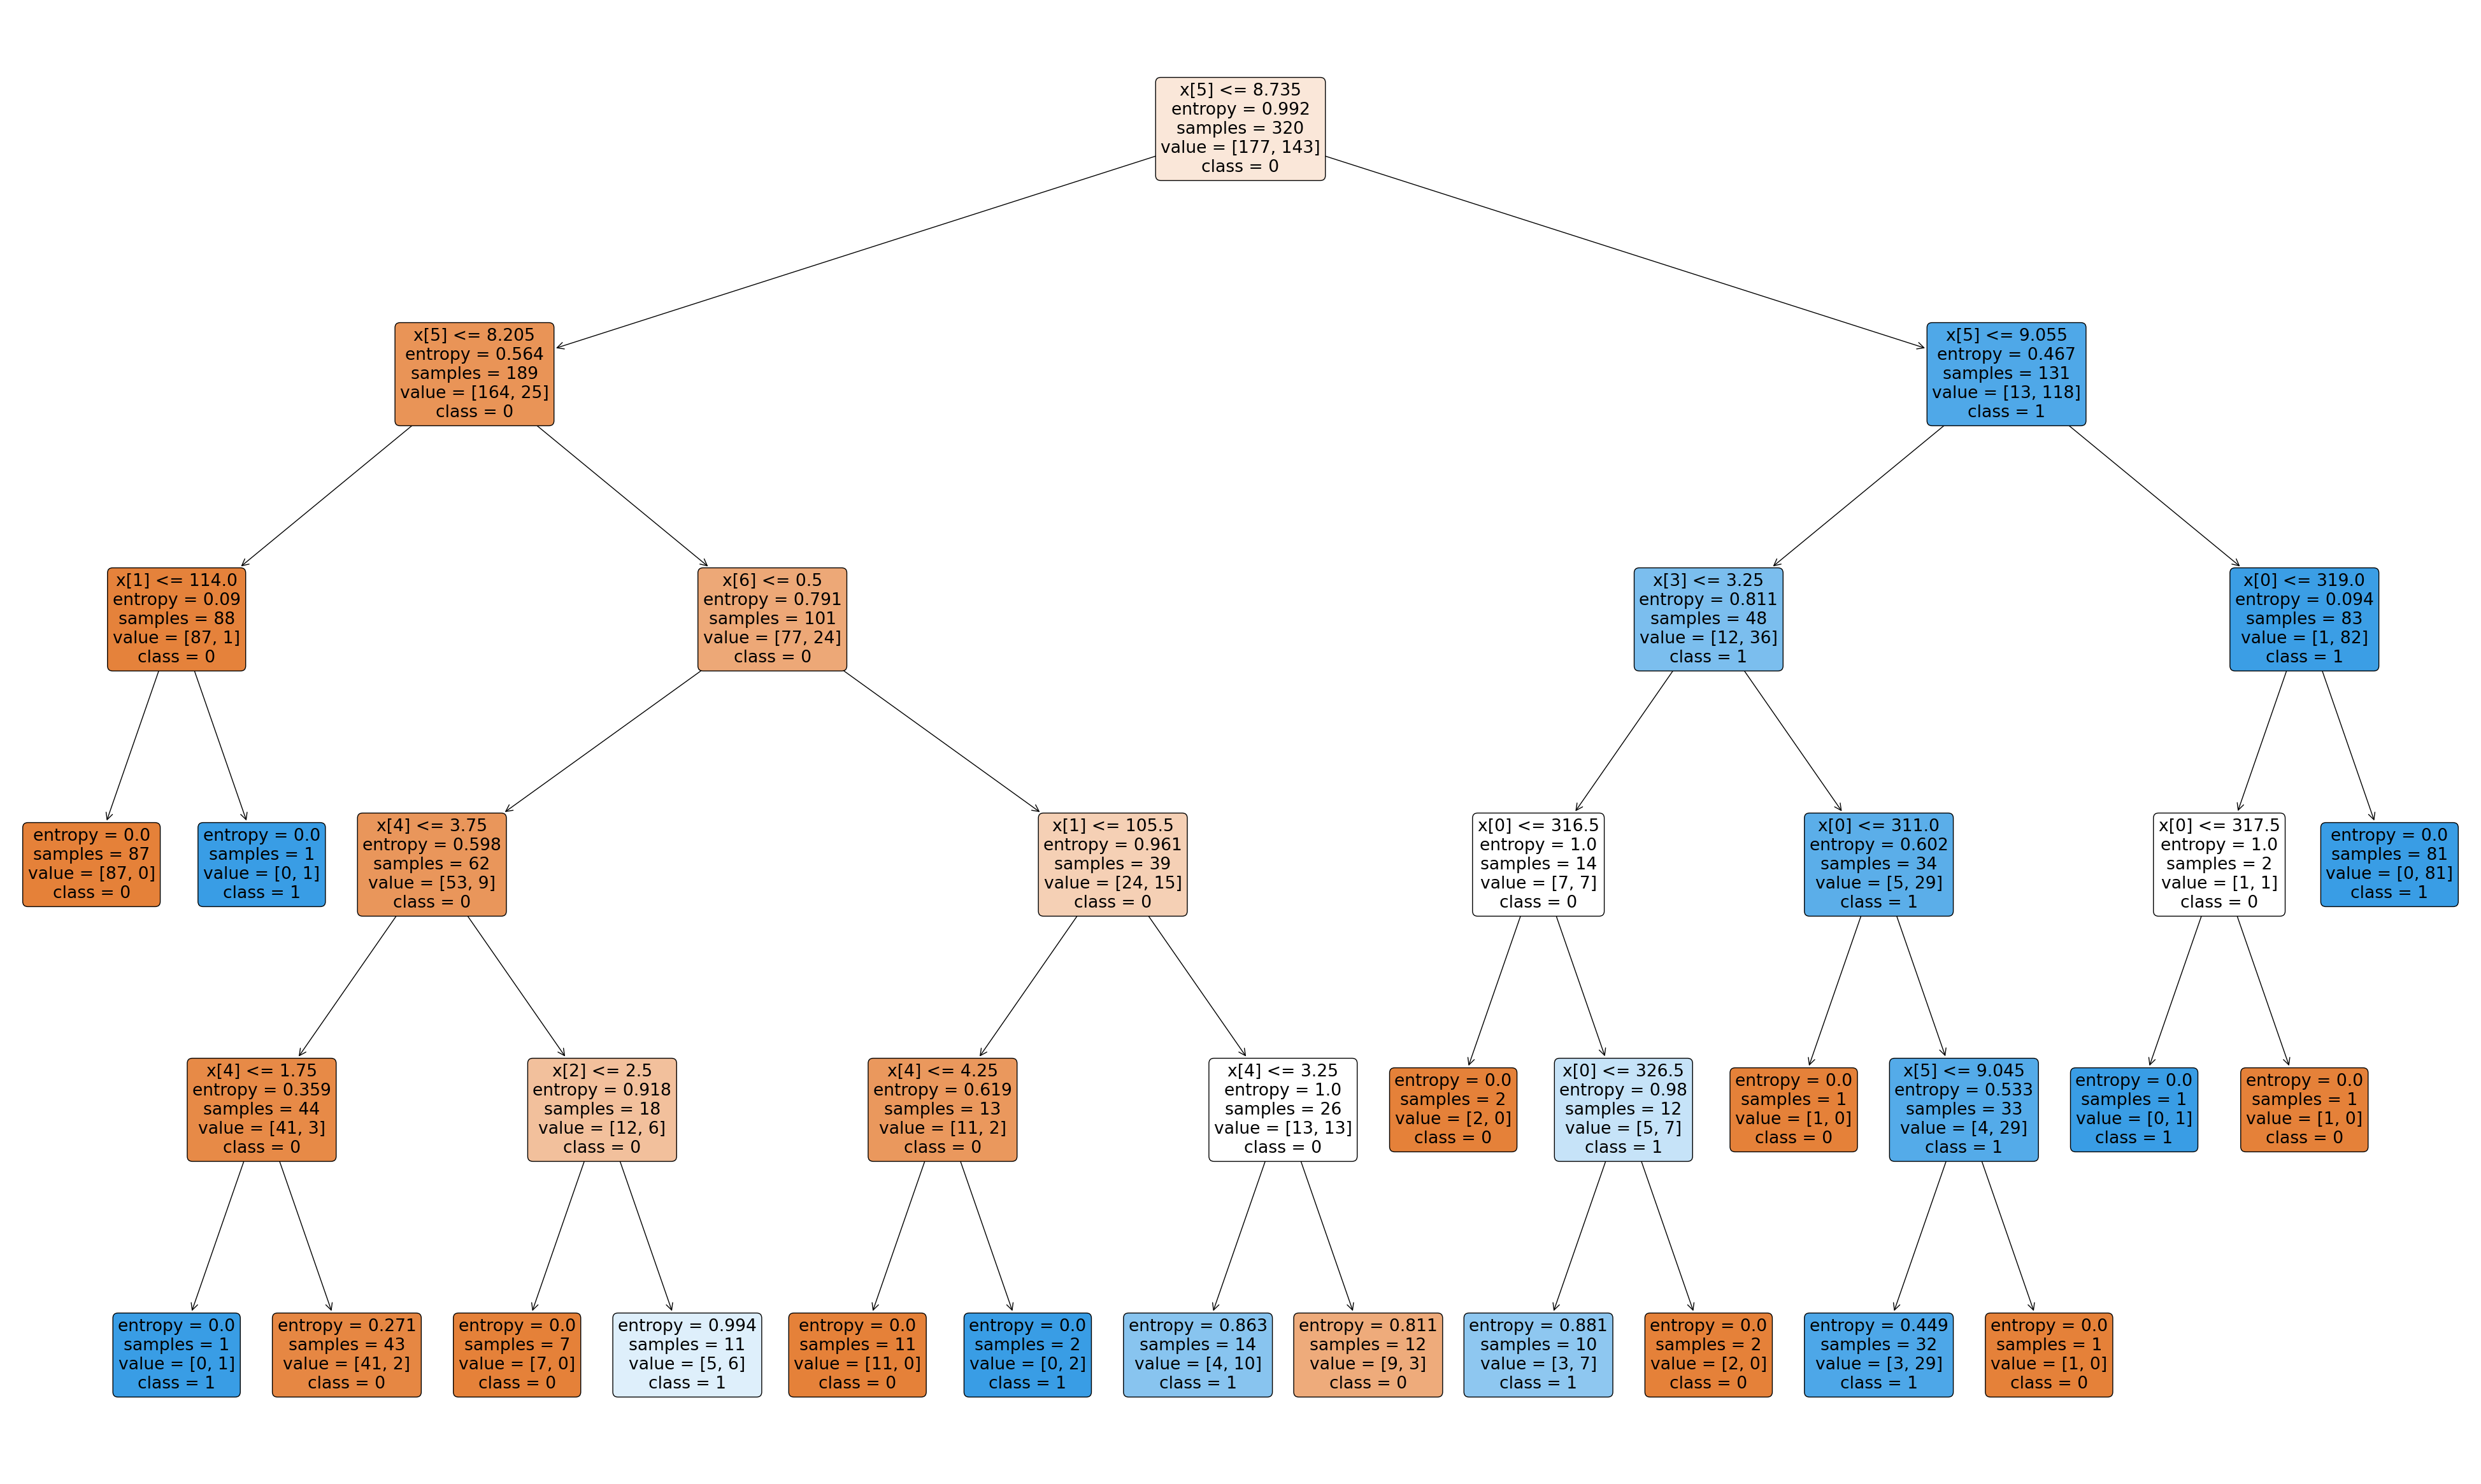

In [65]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth = 5,random_state=1)
dt.fit(X_train,y_train)
pred_test = dt.predict(X_test)
print('Accuracy_score:',accuracy_score(y_true=y_test,y_pred=pred_test))
print('Train_score:',dt.score(X_train,y_train))

plt.figure(figsize=(50,30))
tree.plot_tree(dt,rounded=True,filled=True,class_names=['0','1'])
plt.show()

In [77]:
 dt.feature_importances_ 

array([0.06363433, 0.04535882, 0.02239883, 0.01784984, 0.08441078,
       0.74489572, 0.02145169])

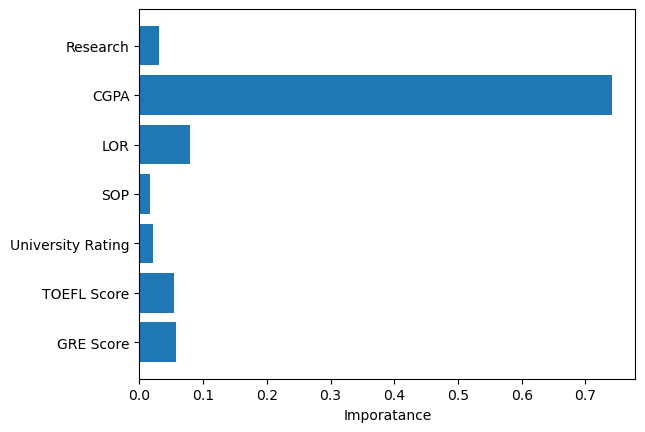

In [82]:
feature_data = pd.DataFrame({"Feature" : X_train.columns,"values" : dt.feature_importances_ })

plt.barh(y=feature_data['Feature'],width=feature_data['values'])
plt.xlabel('Imporatance')
plt.show()

In [78]:
from sklearn.model_selection import GridSearchCV

In [80]:
parameters = {'max_depth':[5,6,7],'criterion':['entropy','gini']}

dt = DecisionTreeClassifier(random_state=1)

dtcv = GridSearchCV(dt,parameters,scoring='accuracy')

dtcv.fit(X_train,y_train)
dtcv.best_params_

{'criterion': 'entropy', 'max_depth': 6}

Accuracy_score: 0.8375
Train_score: 0.94375


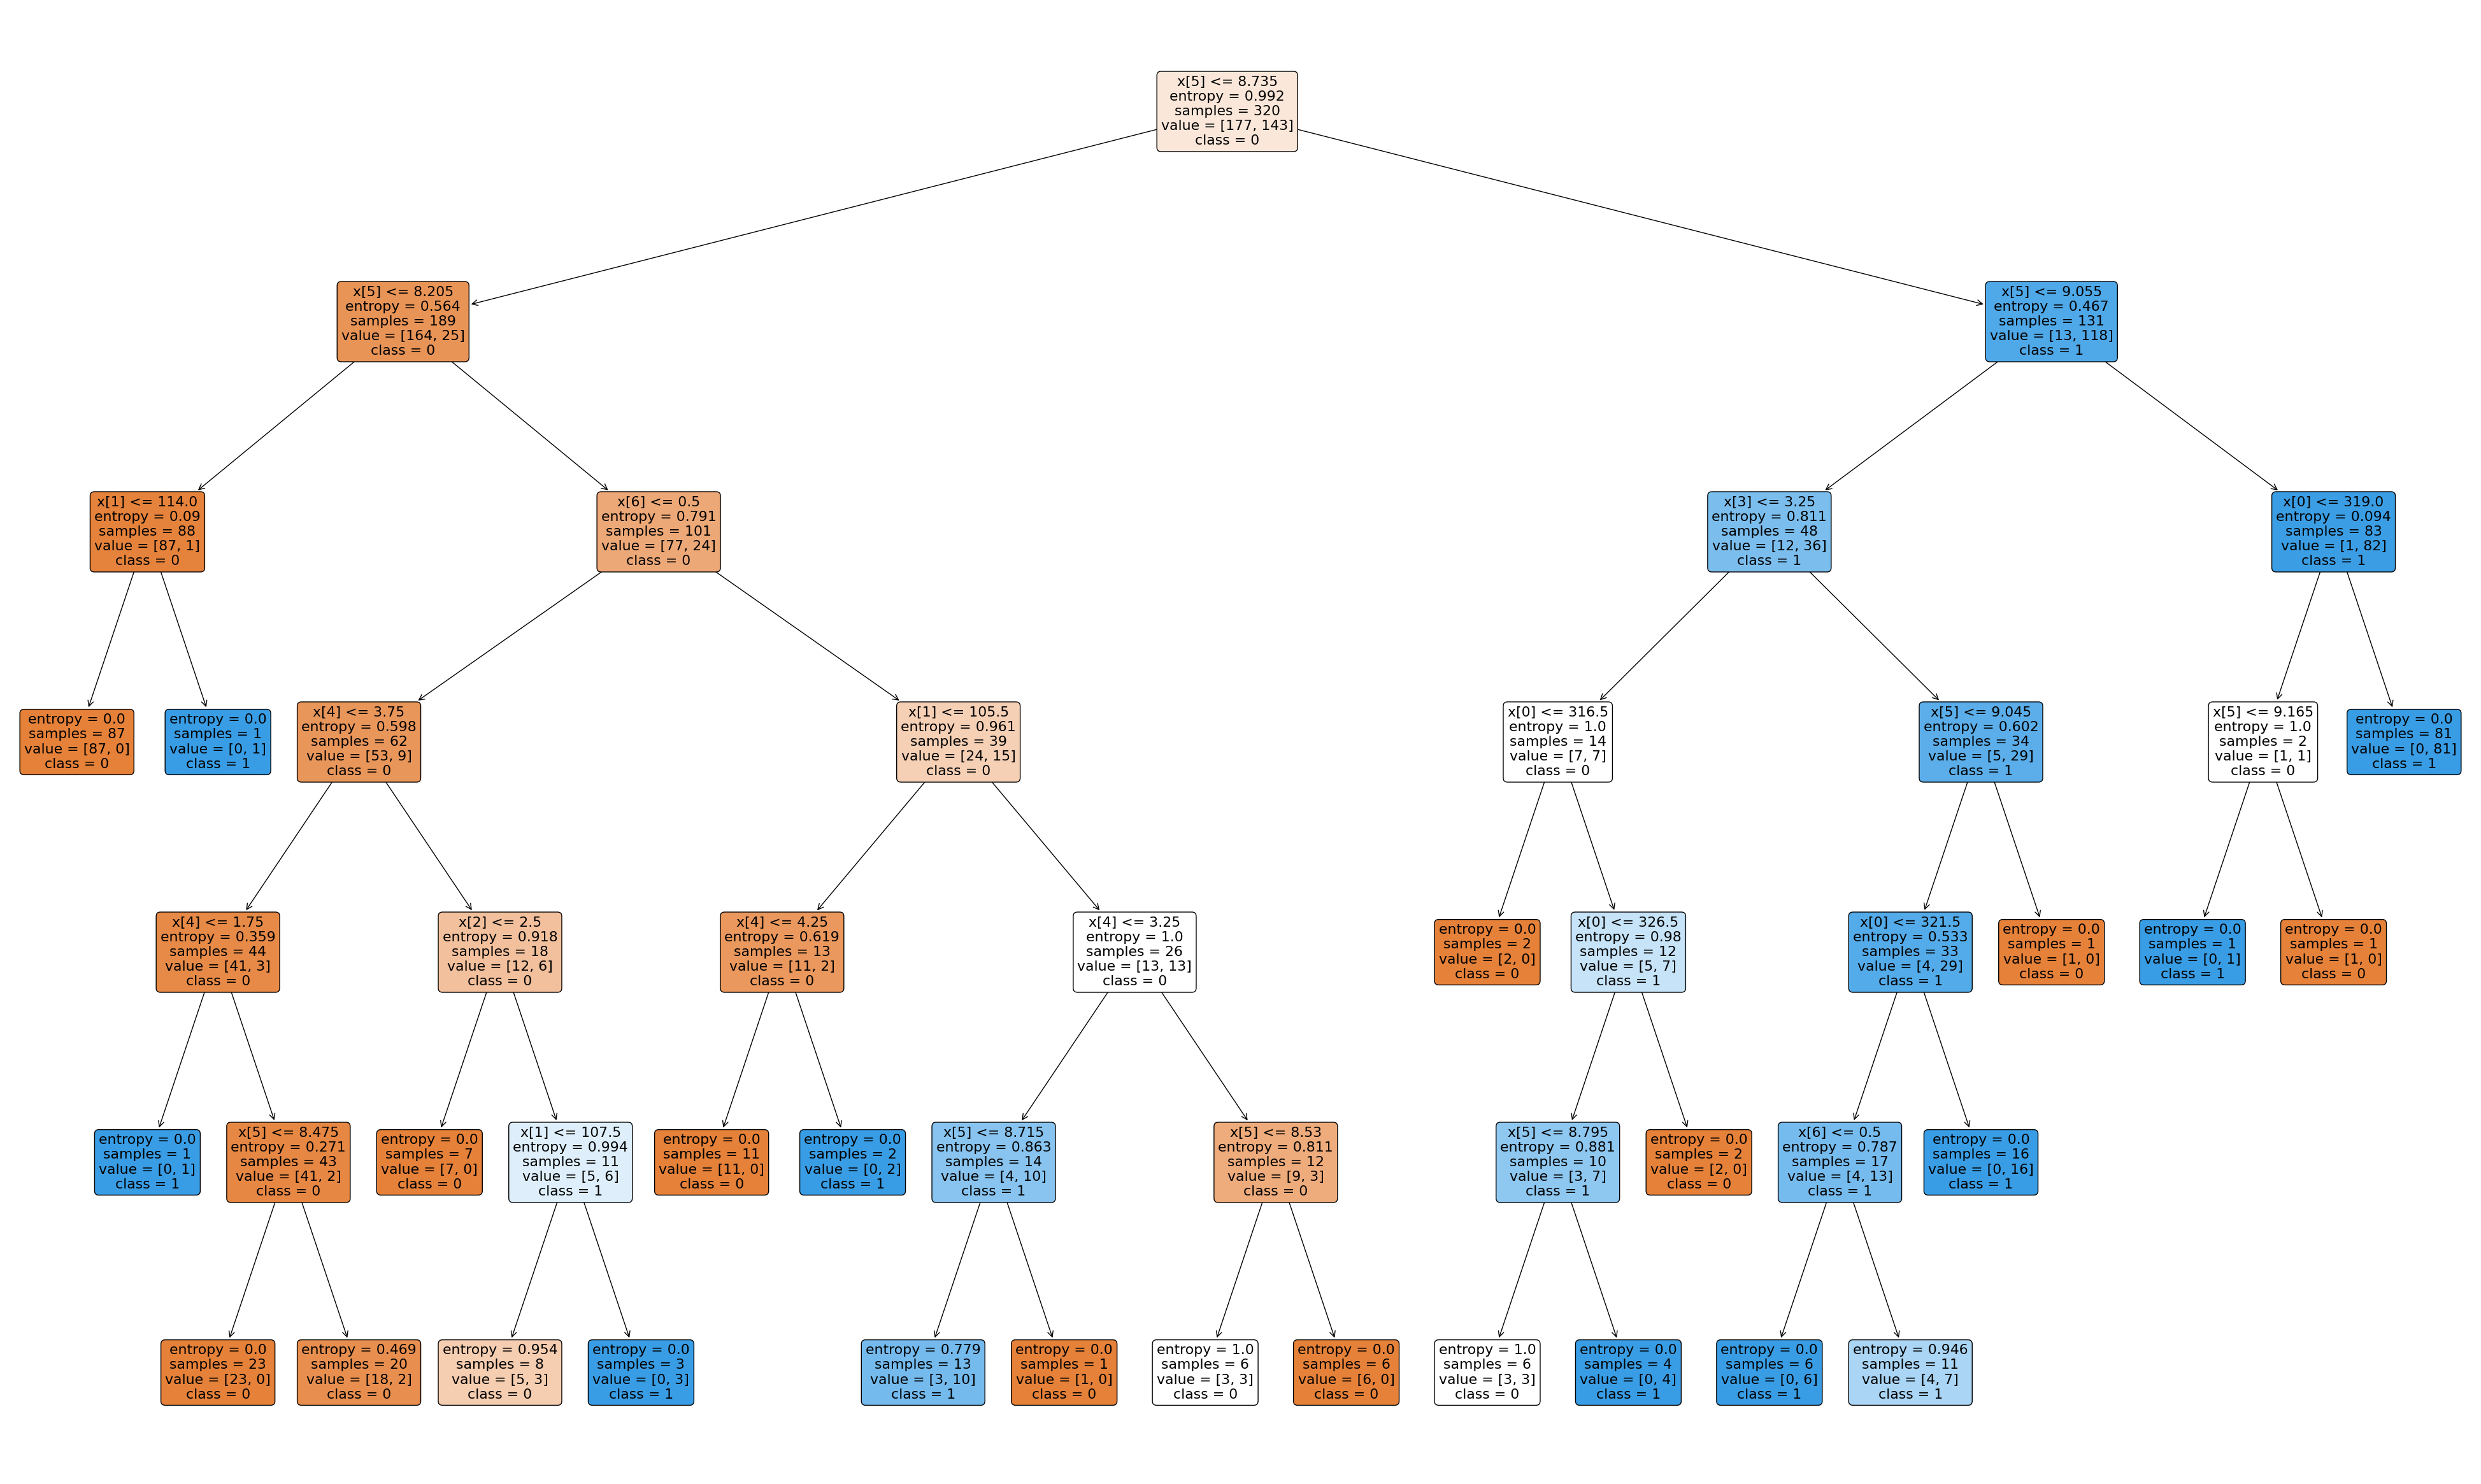

In [81]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth = 6,random_state=1)
dt.fit(X_train,y_train)
pred_test = dt.predict(X_test)
print('Accuracy_score:',accuracy_score(y_true=y_test,y_pred=pred_test))
print('Train_score:',dt.score(X_train,y_train))

plt.figure(figsize=(50,30))
tree.plot_tree(dt,rounded=True,filled=True,class_names=['0','1'])
plt.show()

0.8758642363293525


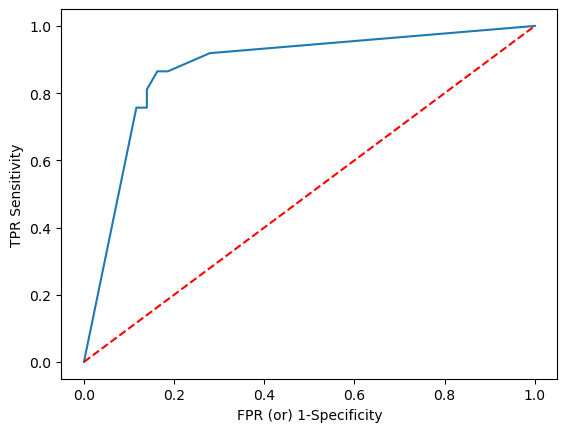

In [86]:
y_pred_prob_dt = dt.predict_proba(X_test)

from sklearn.metrics import roc_auc_score,roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob_dt[:,-1])

plt.plot(fpr, tpr)
plt.xlabel('FPR (or) 1-Specificity')
plt.ylabel('TPR Sensitivity')
plt.plot([0,1],[0,1], 'r--')
plt.show
print(roc_auc_score(y_test, y_pred_prob_dt[:,-1]))